# Neural Networks

This colab walks through the basic pipeline of fitting a simple neural network model. Before we get started, let us recall the basics of a neural network architecture.

### Forward Propagation

A neural network architecture consists of a *forward-propagation* and a *backward-propagation*. 

In *forward propagation*, there is a *linear transformation* and a *non-linear transformation*. The end of the *forward propagation* has a prediction $\hat{Y}$. This prediction allows us to compare our educated guess with the true values $Y$. The choice of the loss function $\mathcal{L}(\hat{Y}, Y)$ is up to human user. 

$$
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_p \\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
a_{<1>}(\cdot) = a_{<1>}(b + \sum w X) \\
a_{<2>}(\cdot) = a_{<2>}(b + \sum w X) \\
\vdots \\
a_{<3>}(\cdot) = a_{<3>}(b + \sum w X) \\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
\hat{Y}_{<1>} \\
\hat{Y}_{<2>} \\
\end{bmatrix}
$$

# Backward Propagation

After we finish *forward propagation*, we start *backward propagation*. The concept of *backward propagation* is essentially gradient descent applied layer-wise to update the weights. These updates go from the last layer backward to the input layer, i.e. hence earned the name *backward propagation*.


$$\mathcal{L}(\hat{Y}, Y) := \sum_i (\hat{Y}_i - Y_i)^2$$

we take gradients (p.d.)

$$
\begin{array}{rcl}
\triangledown \mathcal{L}(\hat{Y},Y) 
&=& \frac{\partial}{\partial a} \sum_i (\hat{Y}_i - Y_i)^2 \\
&=&
\begin{bmatrix}
\frac{\partial}{\partial w}\frac{\partial}{\partial a} \sum_i (\hat{Y}_i - Y_i)^2 \\
\frac{\partial}{\partial b}\frac{\partial}{\partial a} \sum_i (\hat{Y}_i - Y_i)^2 \\
\end{bmatrix}
\end{array}
$$

Notice that in these steps we use the knowledge of chain rule, which is covered in AP Calculus (see [here](https://fiveable.me/ap-calc/unit-3/chain-rule/study-guide/27HxeRGCYJBjuPWBm1uw)).

Update beliefs:
$$
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_p \\
\end{bmatrix}
\leftarrow
\begin{bmatrix}
a_{<1>}(\cdot) = a_{<1>}(b + \sum w X)_{\text{update } w, b}, \text{ update with new } a(\cdot) \\
a_{<2>}(\cdot) = a_{<2>}(b + \sum w X)_{\text{update } w, b}, \text{ update with new } a(\cdot) \\
\vdots \\
a_{<3>}(\cdot) = a_{<3>}(b + \sum w X)_{\text{update } w, b}, \text{ update with new } a(\cdot) \\
\end{bmatrix}
\leftarrow
\begin{bmatrix}
\hat{Y}_{<1>} \\
\hat{Y}_{<2>} \\
\end{bmatrix}
$$

Together, one *forward propagation* and a *backward propagation* forms one epoch. Ideally, the more number of epochs a model is trained, the more accurate the model gets. However, this is not promised due to overfitting.

### Library

The library we are using is called tensorflow. The *TensorFlow* library is a free and open-source software library for machine learning and artificial intelligence. It was originally developed by the Google Brain team for internal use, but was later released to public free of charge. Source is [here](https://en.wikipedia.org/wiki/TensorFlow).

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

Question: What do you think the difference between the following code and *train_test_split()*?

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(training_images.shape)

In [ ]:
import numpy as np
image_sum = np.sum(training_images[training_labels == 1], axis = 0)

Question: Now that we know the shape of training_images, what is the shape of training_labels?

In [ ]:
training_labels.shape 

(60000,)

### Explore Data

What does these values look like? Let's print a training image, and a training label to see... Experiment with different indices in the array. For example, also take a look at random index, and check out what it looks like.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

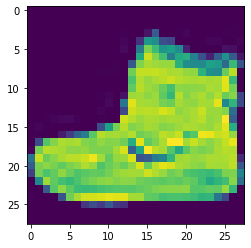

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
#print(training_labels[0])
#print(training_images[0])

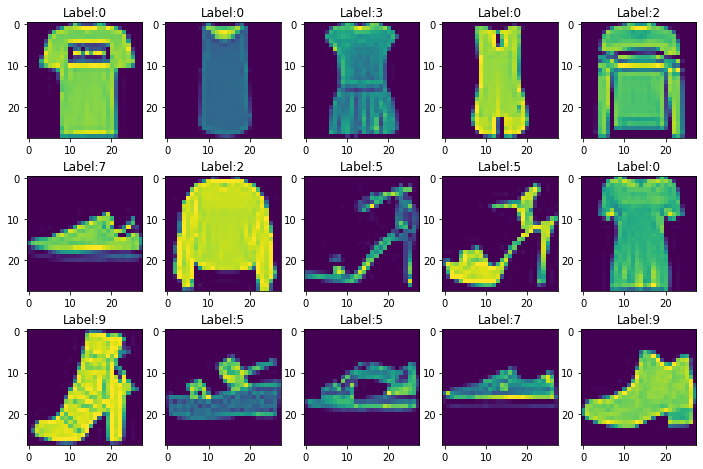

In [ ]:
# grid of rows by columns
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = training_images[i] # get an image, defined as "img"
    fig.add_subplot(rows, columns, i) # create subplot (row index, col index, which number of plot)
    plt.title("Label:" + str(training_labels[i]))
    plt.imshow(img)
plt.show()

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

**Question:** If my largest value is 255 and smallest value is 0, What should I divide the training_images and test_images by to "normalize" all the values to between 0 and 1?

In [ ]:
# rescale data
training_images  = training_images / 255
test_images = test_images / 255 

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

### Build a Simple Neural Network Model

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [ ]:
# use sequential api to build model
model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(), # this function converts image from (28, 28) to 1D array 28^2 = 784
     tf.keras.layers.Dense(128, activation=tf.nn.relu), # 128 is a choice # ReLU(x) = max(x, 0)
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ]) 
# softmax is designed for multi-class classification, the number of units in the last layer should be the
# same as the number of classes you have in your dataset this is why 10 is where it is

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [ ]:
# compile model
model.compile(optimizer = "adam", # recall: gradient descent, stochastic gradient descent, RmsProp, ADAM
              loss = 'sparse_categorical_crossentropy', # loss: mean_square_error, mean_absolute_error, cross_entropy, binary_cross_entropy
              metrics=['accuracy'])

In [ ]:
# train model using function .fit:
# epoch: one epoch is forward propagation + backward propagation once (1 cycle)
# training set X => images
# training set Y => labels (10 classes)
history = model.fit(training_images, training_labels, epochs=10,
                    validation_data=[test_images, test_labels])
# number of epoch has a sweet spot
# too large: you may overfit => training performance is good, but validating set is bad
# too little: you may underfit => training performance is not that good, and so is validating set => you are not there yet

In [ ]:
# define plot_graphs function
# do not edit
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.5131932690739631)

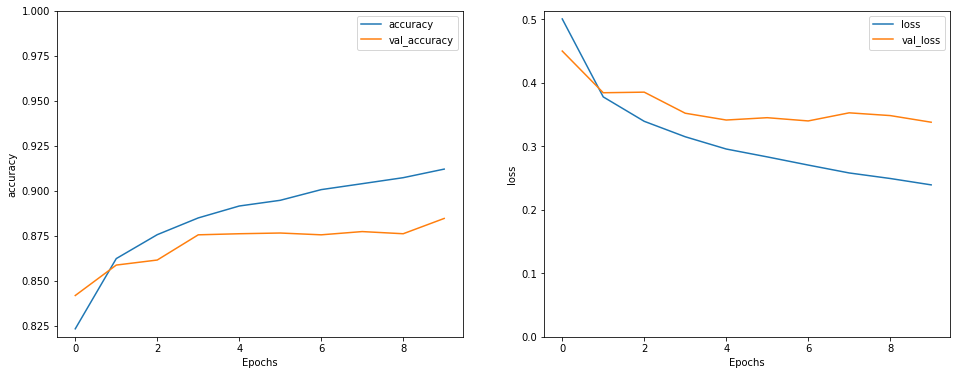

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

Question: Why is there a difference between training loss and validation loss?

### Evaluate the model

Recall from the last session, we discussed in logistic regression the models are evaluated using accuracy or ROC AUC. In this case, since we have a 10-class classification task, we can just directly use accuracy.

The fastest way is to use the method called *.evaluate()*.

## Instructions for Small Groups

- Begin by discussing any questions on lecture and code walkthrough
- Give a brief overview of the problem set
- Allow students to code independently for at least 10 min
- Check in with students to answer questions
- Allow students to share their answers
- Repeat independent coding and review

In [ ]:
# test images and labels are different instances in the same dataset
# "different" => this is for performance robustness purpose you don't want to use the same images
# "same" dataset => this is for the same type of data | 
#    for example, if the data is trained using clothes image, then cat image is not gonna get recognized
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8846


[0.3376271724700928, 0.8845999836921692]

In [ ]:
import sklearn.metrics as metrics

In [ ]:
# display test set labels
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
import numpy as np

In [ ]:
# extract the predicted labels
test_labels_pred = np.argmax(model.predict(test_images), axis=1)
test_labels_pred

array([9, 2, 1, ..., 8, 1, 5])

Predictions are probabilites for each class. Argmax is looking for the argument that has the maximum probability. 

Question: Will the test_labels_pred be integer lables or decimal probabilities?

In [ ]:
# construct confusion matrix (notice that there should be 10 rows and 10 columns)
test_set_confusion_mat = metrics.confusion_matrix(y_true=test_labels, y_pred=test_labels_pred)
test_set_confusion_mat

array([[873,   0,  20,  39,   3,   0,  61,   0,   4,   0],
       [  3, 967,   2,  20,   3,   0,   4,   0,   1,   0],
       [ 21,   0, 819,  13,  93,   0,  53,   0,   1,   0],
       [ 25,   3,  10, 925,  21,   0,  12,   0,   4,   0],
       [  0,   0,  92,  42, 806,   0,  54,   0,   6,   0],
       [  0,   0,   0,   1,   0, 950,   0,  27,   1,  21],
       [151,   0, 103,  40,  78,   0, 617,   0,  11,   0],
       [  0,   0,   0,   0,   0,  10,   0, 968,   0,  22],
       [  7,   0,   5,   4,   2,   1,   5,   3, 973,   0],
       [  1,   0,   0,   0,   0,   7,   0,  44,   0, 948]])

Question: What is the shape of the confusion matrix?

In [ ]:
test_set_confusion_mat.shape

(10, 10)

In [ ]:
# quick way to taking diagnoal entries of a 2-by-2 numpy array
np.diagonal(test_set_confusion_mat)

array([873, 967, 819, 925, 806, 950, 617, 968, 973, 948])

Question: Why is the diagonal of the confusion matrix important?

In [ ]:
# take the sum of all the diagnoal entries of a 2-by-2 numpy array
np.diagonal(test_set_confusion_mat).sum()

8846

In [ ]:
# compute accuracy for test set confusion matrix
np.diagonal(test_set_confusion_mat).sum() / test_set_confusion_mat.sum()

0.8846

In [ ]:
# define a function that computes accuracy
def quick_accuracy(test_set_confusion_mat):
  return np.diagonal(test_set_confusion_mat).sum()/test_set_confusion_mat.sum()

In [ ]:
# test
quick_accuracy(test_set_confusion_mat)

0.8846

Investigation ends here.